In [1]:
import datetime as dt
import numpy as np
import pandas as pd

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect
import matplotlib.pyplot as plt
import folium
%matplotlib inline

In [2]:
engine = create_engine("sqlite:///../db/apache.sqlite")
base= automap_base()
base.prepare(engine, reflect=True)
inspector = inspect(engine)
log_table = base.classes.access_response
session = Session(engine)

In [3]:
date_range_2018 = 'select * from access_response where DateTime like "%2018%"'
date_range_2018_results= pd.read_sql_query(date_range_2018, session.bind)

In [4]:
everything = 'select * from access_response'
everything_df = pd.read_sql_query(everything, session.bind)

In [5]:
len(date_range_2018_results)

5442

In [6]:
admin_query = 'select id from access_response where URL like "%admin%" and DateTime like "2018%"'
admin_results = pd.read_sql_query(admin_query, session.bind)

In [7]:
admin_results['admin'] = 'admin'

In [8]:
everything_df = pd.merge(everything_df, admin_results, how='outer', on='id')

In [9]:
setup_query = 'select id from access_response where URL like "%setup%" and DateTime like "2018%"'
setup_results = pd.read_sql_query(setup_query, session.bind)

In [10]:
#setup_results

In [11]:
len(setup_results)

477

In [12]:
setup_results['setup'] = 'setup'

In [13]:
#setup_results

In [14]:
everything_df = pd.merge(everything_df, setup_results, how='outer', on='id')

In [15]:
login_query = 'select id from access_response where URL like "%login%" and DateTime like "2018%"'
login_results = pd.read_sql_query(login_query, session.bind)

In [16]:
#login_results

In [17]:
len(login_results)

57

In [18]:
login_results['login'] = 'login'

In [19]:
everything_df = pd.merge(everything_df, login_results, how='outer', on='id')

In [20]:
test_query = 'select id from access_response where URL like "%test%" and DateTime like "2018%"'
test_results = pd.read_sql_query(test_query, session.bind)

In [21]:
test_results['test'] = 'test'

In [22]:
len(test_results)

13

In [23]:
#test_results

In [24]:
everything_df = pd.merge(everything_df, test_results, how='outer', on='id')

In [25]:
login_query = 'select id from access_response where URL like "%login%" and DateTime like "2018%"'
login_results = pd.read_sql_query(login_query, session.bind)

In [26]:
#login_results

In [27]:
everything_df = pd.merge(everything_df, login_results, how='outer', on='id')

In [28]:
ramble_query = 'select id from access_response where URL like "%ramble%" and DateTime like "2018%"'
ramble_results = pd.read_sql_query(ramble_query, session.bind)

In [29]:
#ramble_results

In [30]:
len(ramble_results)

158

In [31]:
ramble_results['ramble'] = 'ramble'

In [32]:
everything_df = pd.merge(everything_df, ramble_results, how='outer', on='id')

In [33]:
ua_script_query = 'select id, URL from access_response where UserAgent like "%urll%" or UserAgent like "%curl%" and DateTime like "2018%"'
ua_script_results = pd.read_sql_query(ua_script_query, session.bind)

In [34]:
len(ua_script_results)

330

In [35]:
#ua_script_results

In [36]:
ua_script_results_no_cat = ua_script_results[(ua_script_results.URL != '/phone_pix/cat.jpg')]

In [37]:
#ua_script_results_no_cat

In [38]:
len(ua_script_results_no_cat)

246

In [39]:
ua_script_results['scripts'] = 'scripts'

In [40]:
everything_df = pd.merge(everything_df, ua_script_results, how='outer', on='id')

In [41]:
everything_df = everything_df.drop('URL_y', axis=1)

In [42]:
everything_df = everything_df.fillna('-')

In [43]:
everything_df

,id,ip,DateTime,TimeZone,Method,URL_x,ResponseCode,Referer,BytesSent,UserAgent,latitude,longitude,admin,setup,login,test,ramble,scripts
0,1,62.170.2.205,2018-04-08 07:19:25,GMT-0700,HEAD,http://198.27.242.168:80/phpmyadmin/,404,-,220,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,37.15,15.1833,admin,-,-,-,-,-
1,2,62.170.2.205,2018-04-08 07:19:25,GMT-0700,HEAD,http://198.27.242.168:80/PMA/,404,-,219,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,37.15,15.1833,-,-,-,-,-,-
2,3,62.170.2.205,2018-04-08 07:19:25,GMT-0700,HEAD,http://198.27.242.168:80/dbadmin/,404,-,219,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,37.15,15.1833,admin,-,-,-,-,-
3,4,62.170.2.205,2018-04-08 07:19:26,GMT-0700,HEAD,http://198.27.242.168:80/pma/,404,-,219,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,37.15,15.1833,-,-,-,-,-,-
4,5,62.170.2.205,2018-04-08 07:19:26,GMT-0700,HEAD,http://198.27.242.168:80/db/,404,-,219,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,37.15,15.1833,-,-,-,-,-,-
5,6,108.41.39.187,2018-04-08 07:53:03,GMT-0700,GET,/phone_pix/cat.jpg,404,-,534,just some guy,40.5833,-73.924,-,-,-,-,-,-
6,7,74.208.182.37,2018-04-08 09:00:47,GMT-0700,GET,/,200,-,562,Mozilla/4.0 (compatible; MSIE 5.0; Windows NT;...,40.0548,-75.4083,-,-,-,-,-,-
7,8,46.229.164.102,2018-04-08 09:58:37,GMT-0700,GET,/robots.txt,200,-,385,Mozilla/5.0 (compatible; SemrushBot/1.2~bl; +h...,39.018,-77.539,-,-,-,-,-,-
8,9,96.57.208.218,2018-04-08 09:59:37,GMT-0700,HEAD,http://198.27.242.168:80/phpmyadmin/,404,-,220,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,37.751,-97.822,admin,-,-,-,-,-
9,10,96.57.208.218,2018-04-08 09:59:37,GMT-0700,HEAD,http://198.27.242.168:80/PMA/,404,-,219,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,37.751,-97.822,-,-,-,-,-,-


In [44]:
admin_percent = (everything_df['admin'].value_counts()[1])/(len(everything_df))*100

In [45]:
admin_percent

1.9060341457057213

In [46]:
setup_percent = (everything_df['setup'].value_counts()[1])/(len(everything_df))*100

In [47]:
login_percent = (everything_df['login'].value_counts()[1])/(len(everything_df))*100

In [48]:
test_percent = (everything_df['test'].value_counts()[1])/(len(everything_df))*100

In [49]:
ramble_percent = (everything_df['ramble'].value_counts()[1])/(len(everything_df))*100

In [50]:
scripts_percent = (everything_df['scripts'].value_counts()[1])/(len(everything_df))*100

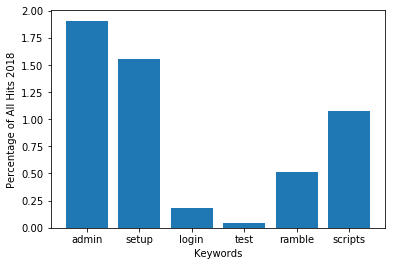

In [54]:
fig,ax = plt.subplots()
plt.bar(x = [1,2,3,4,5,6], height = [admin_percent,setup_percent,login_percent,test_percent,ramble_percent,scripts_percent])
plt.xticks([1,2,3,4,5,6], ['admin','setup','login','test','ramble','scripts'])
plt.xlabel('Keywords')
plt.ylabel('Percentage of All Hits 2018')
plt.savefig('keywords_2018.png')

In [55]:
calls_list = ['ip','admin','setup','login','test','ramble','scripts','URL_x','ResponseCode','latitude','longitude']

In [56]:
calls_list_df = everything_df[calls_list]

In [57]:
calls_list_df.head()

,ip,admin,setup,login,test,ramble,scripts,URL_x,ResponseCode,latitude,longitude
0,62.170.2.205,admin,-,-,-,-,-,http://198.27.242.168:80/phpmyadmin/,404,37.15,15.1833
1,62.170.2.205,-,-,-,-,-,-,http://198.27.242.168:80/PMA/,404,37.15,15.1833
2,62.170.2.205,admin,-,-,-,-,-,http://198.27.242.168:80/dbadmin/,404,37.15,15.1833
3,62.170.2.205,-,-,-,-,-,-,http://198.27.242.168:80/pma/,404,37.15,15.1833
4,62.170.2.205,-,-,-,-,-,-,http://198.27.242.168:80/db/,404,37.15,15.1833


In [58]:
admin_filter_df = calls_list_df[calls_list_df['admin'] != '-']

In [59]:
# Create our initial map object
# Set the longitude, latitude, and the starting zoom level
my_map = folium.Map(location=[24.650338, -35.815542], zoom_start=2)#, tiles=outdoors_tile, attr=attr)

In [60]:
# adding additional overlay layers (featuregroups) can be toggled on or off
# this is called layerGroup in leaflet.js
admin_layer = folium.FeatureGroup(name='Admin')

for i, row in admin_filter_df.iterrows():
    # Create a marker and pass in lat lon and city name
    folium.Marker([row['latitude'],row['longitude']],
                  popup="<h1>" + row['ip'] + "</h1>" + "<hr>" + row['URL_x']
                 ).add_to(admin_layer)

In [61]:
setup_filter_df = calls_list_df[calls_list_df['setup'] != '-']

In [62]:
#setup_filter_df

In [63]:
setup_layer = folium.FeatureGroup(name='Setup')

for i, row in setup_filter_df.iterrows():
    # Create a marker and pass in lat lon and city name
    folium.Marker([row['latitude'],row['longitude']],
                  popup="<h1>" + row['ip'] + "</h1>" + "<hr>" + row['URL_x']
                 ).add_to(admin_layer)

In [64]:
login_filter_df = calls_list_df[calls_list_df['login'] != '-']

In [65]:
#login_filter_df

In [66]:
login_layer = folium.FeatureGroup(name='Login')

for i, row in login_filter_df.iterrows():
    # Create a marker and pass in lat lon and city name
    folium.Marker([row['latitude'],row['longitude']],
                  popup="<h1>" + row['ip'] + "</h1>" + "<hr>" + row['URL_x']
                 ).add_to(admin_layer)

In [67]:
test_filter_df = calls_list_df[calls_list_df['test'] != '-']

In [68]:
#test_filter_df

In [69]:
test_layer = folium.FeatureGroup(name='Test')

for i, row in test_filter_df.iterrows():
    # Create a marker and pass in lat lon and city name
    folium.Marker([row['latitude'],row['longitude']],
                  popup="<h1>" + row['ip'] + "</h1>" + "<hr>" + row['URL_x']
                 ).add_to(admin_layer)

In [70]:
ramble_filter_df = calls_list_df[calls_list_df['ramble'] != '-']

In [71]:
#ramble_filter_df

In [72]:
ramble_layer = folium.FeatureGroup(name='Ramble')

for i, row in ramble_filter_df.iterrows():
    # Create a marker and pass in lat lon and city name
    folium.Marker([row['latitude'],row['longitude']],
                  popup="<h1>" + row['ip'] + "</h1>" + "<hr>" + row['URL_x']
                 ).add_to(admin_layer)

In [73]:
scripts_filter_df = calls_list_df[calls_list_df['scripts'] != '-']

In [74]:
scripts_layer = folium.FeatureGroup(name='Scripts')

for i, row in scripts_filter_df.iterrows():
    # Create a marker and pass in lat lon and city name
    folium.Marker([row['latitude'],row['longitude']],
                  popup="<h1>" + row['ip'] + "</h1>" + "<hr>" + row['URL_x']
                 ).add_to(admin_layer)

In [75]:
# add the feature group to our map
admin_layer.add_to(my_map) 
setup_layer.add_to(my_map)
login_layer.add_to(my_map)
test_layer.add_to(my_map)
scripts_layer.add_to(my_map)

# add layer control to toggle on/off
folium.LayerControl().add_to(my_map)

# save HTML
my_map.save('keywords_2018.html')

# display the map
my_map